# **Principal Component Analysis of Breast Cancer Data**


###  Tonglu Dou，       2020-06-05

##  1 Introduction of PCA

###   1.1 What is PCA?

- <font  size=4> Given a collection of points in two, three, or higher dimensional space, a **<font color=red>"best fitting"</font>** line can be defined as one that **<font color=red>minimizes</font>** the average squared distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called **<font color=blue>principal components</font>**, and several related procedures **<font color=blue>principal component analysis (PCA)</font>**.
- A **<font color=purple>dimensionality reduction</font>** technique based upon **<font color=purple>linear algebra**.</font>



###  1.2 The geometric meaning of PCA


<font  size=4>In general, for example, there are n samples, and each sample has two variable values X1 and X2. The scatter plot of these n samples is like a strip. It can be seen from the figure that the n sample points are either along the X1 axis or The X2 axis direction has a large dispersion, and the degree of dispersion can be quantitatively expressed by the variance of the observation variable X1 and the variance of X2, respectively.</font>

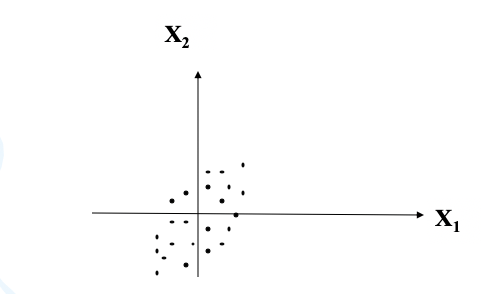

In [97]:
from IPython.display import Image
Image("/Users/lucydou/Documents/MATLAB/BIEN202/5.png")

<font  size=4>Similarly, we rotate the X1 axis and the X2 axis simultaneously in a counterclockwise direction by an angle of θ to obtain new coordinate axes Y1 and Y2. Y1 and Y2 are two new variables. According to the coordinate rotation transformation formula in analytic geometry:</font>

<font  size=4.5>$$Y_1 = X_1cosθ + X_2sinθ$$
$$Y_2 = -X_1sinθ + X_2cosθ$$</font>

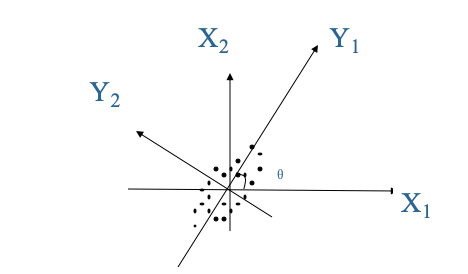

In [98]:
from IPython.display import Image
Image("/Users/lucydou/Documents/MATLAB/BIEN202/4.png")

###  1.3 PCA algorithm flow

###  (1) Input: Raw matrix data

<font  size=4>$$
X = \left [
\begin{matrix}
x_{11} & ... & x_{1p} \\
... &  & ... \\
x_{n1} & ... & x_{np}
\end{matrix}
\right ] \tag{3-3}
$$</font>

###  (2) Calculate sample covariance matrix

<font  size=4>Assuming that there are p indicators in the actual problem we are discussing, we consider these p indicators as p random variables, denoted as X1, X2, ..., Xp</font>
<font  size=4.5>$$Y_1 = a_{11}X_1+a_{12}X_2+...+a_{1p}X_p$$
                $$Y_2 = a_{21}X_1+a_{22}X_2+...+a_{2p}X_p$$
                <center>...</center> 
                $$Y_p = a_{p1}X_1+a_{p2}X_2+...+a_{pp}X_p$$</font>

###  (3) Find the eigenvalues and corresponding eigenvectors of the covariance matrix

###  (4) Find the principal component

<font  size=4.5>$$Y_1 = a_{11}X_1+a_{12}X_2+...+a_{1p}X_p$$
                $$Y_2 = a_{21}X_1+a_{22}X_2+...+a_{2p}X_p$$
                <center>...</center> 
                $$Y_p = a_{p1}X_1+a_{p2}X_2+...+a_{pp}X_p$$</font>

###  (5) The feature vectors are arranged in rows according to the corresponding feature value from large to small, and the first k rows are taken to form a matrix K

##  2 Importing Libraries and Loading the Data

<font  size=4>Import the dataset from the python library sci-kit-learn.The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.The malignant class has 212 samples, whereas the benign class has 357 samples.It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.</font>

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [100]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer.keys()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

<font  size=4>Let's print the features that are there in the breast cancer dataset.</font>

In [101]:
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [102]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3 Data Visualization using PCA
<font  size=4>As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find **<font color=red>the first 2 principal components</font>**, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.It is a common practice to normalize your data before feeding it to any machine learning algorithm.While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.</font>

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
scaled_data = scaler.transform(df)

## 3.1  Importing PCA

<font  size=4>In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:</font>

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [105]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


<font  size=4>From the above output, we can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information, so  principal component 1 and  principal component 2 hold 63.2%  of the information in total. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.
    
Now we can transform this data to its first 2 principal components.</font>

In [106]:
x_pca = pca.transform(scaled_data)

In [107]:
scaled_data.shape

(569, 30)

In [108]:
x_pca.shape

(569, 2)

## 3.2 Plotting figure

<font  size=4>We've reduced 30 dimensions to just 2. To plot these two dimensions out.</font>

Text(0.5, 1.0, 'Principal Component Analysis of Breast Cancer Dataset')

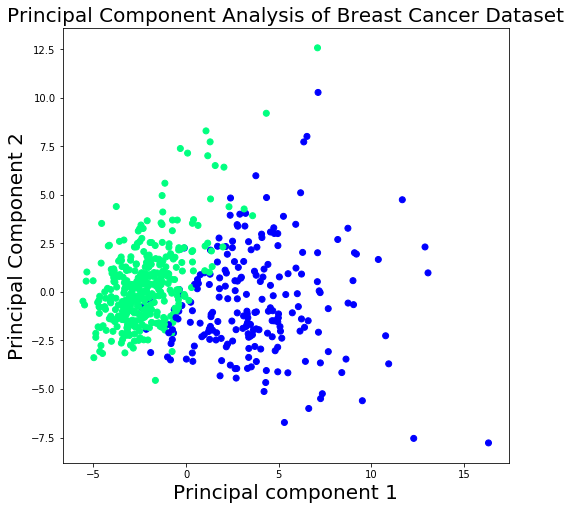

In [109]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='winter')
plt.xlabel('Principal component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

<font  size=4>From the above figure, we can see that the two classes benign(blue) and malignant(green), when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.</font>

In [110]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

## 3.3 Plotting heatmap

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

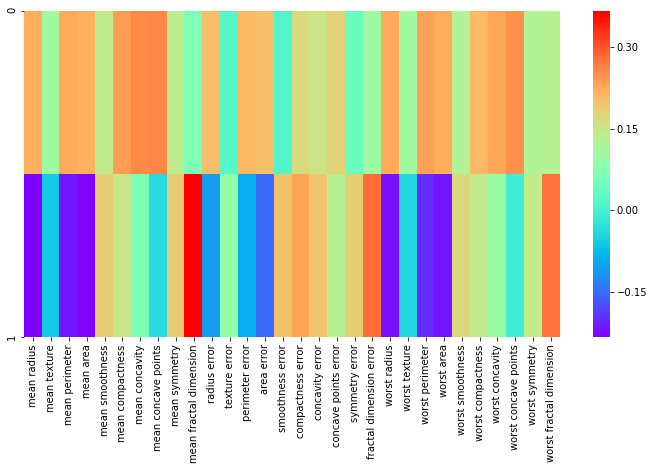

In [111]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='rainbow',)

## 4 Discussion

<font  size=4>As a dimensionality reduction method for unsupervised learning, PCA only needs eigenvalue decomposition to compress and denoise data. Therefore, it is widely used in actual scenarios.</font>

## 4.1 Advantages
- <font  size=4> It is only necessary to measure the amount of information by variance, and it is not affected by factors outside the data set.
- The orthogonality between the principal components can eliminate the mutual influence factors between the original data components.
- The calculation method is simple, and the main operation is eigenvalue decomposition, which is easy to implement.</font>
 

## 4.2 Disadvantages

- <font  size=4>The meaning of each feature dimension of the principal component has a certain degree of ambiguity, which is not as interpretable as the features of the original sample.
- Non-principal components with small variances may also contain important information about sample differences, and discarding due to dimensionality reduction may have an impact on subsequent data processing.</font>

## Reference
- W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
- O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html(Acessed: 2020-06-03,23:38pm)
- https://matplotlib.org/2.0.1/users/colormaps.html(Acessed: 2020-06-03,23:39pm)
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html(Acessed: 2020-06-03,23:40pm)